### DEEP LEARNING - **_Clasificador de imagenes_**

¿Perros o gatos? Educando el modelo.

In [1]:
# Importacion de librerias

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import shutil
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses
from tensorflow.keras.models import load_model

In [2]:

# Directorio donde están las imágenes mezcladas
source_dir = "../images/raw/train"

# Directorios de destino para gatos y perros
cat_dir = "../images/raw/train/cats"
dog_dir = "../images/raw/train/dogs"

# Crear directorios de destino si no existen
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Obtener la lista de archivos en el directorio fuente
files = os.listdir(source_dir)

# Iterar sobre los archivos y moverlos según el prefijo
for file in files:
    if file.startswith('cat') and os.path.isfile(os.path.join(source_dir, file)):
        shutil.move(os.path.join(source_dir, file), os.path.join(cat_dir, file))
    elif file.startswith('dog') and os.path.isfile(os.path.join(source_dir, file)):
        shutil.move(os.path.join(source_dir, file), os.path.join(dog_dir, file))

print("Imágenes separadas correctamente.")

Imágenes separadas correctamente.


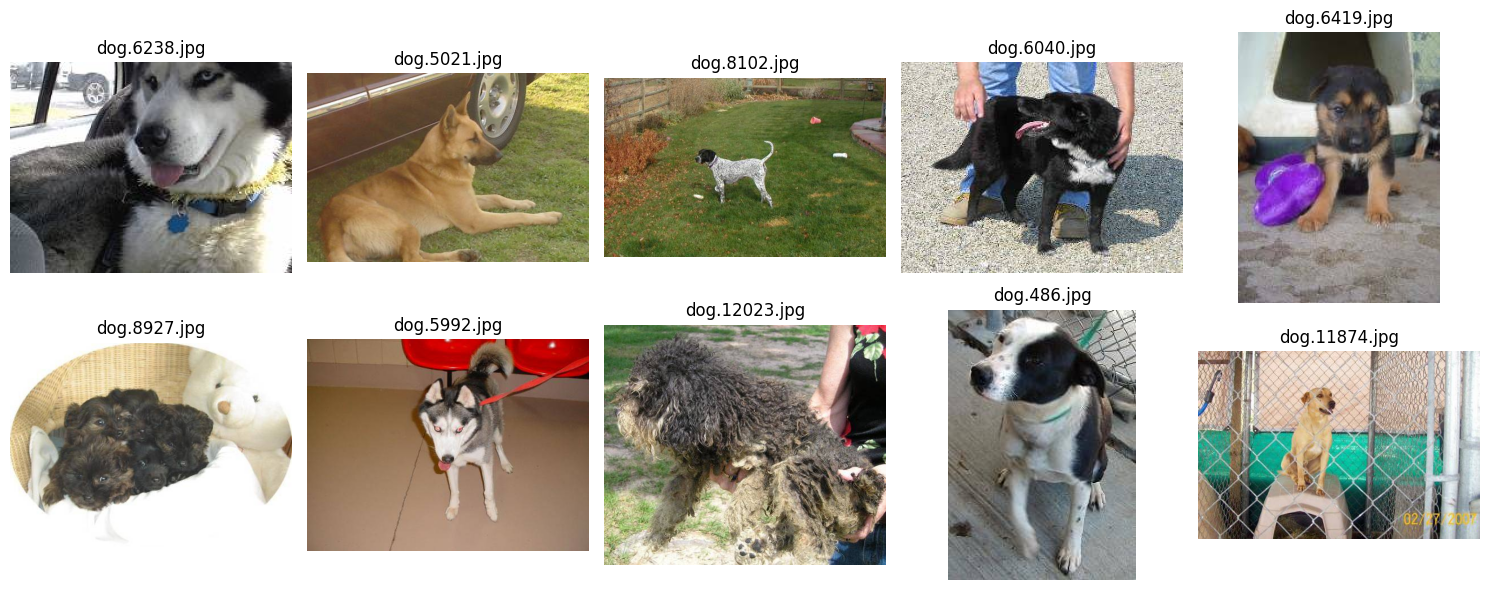

In [3]:
# Obtener una lista de todos los nombres de archivos de imágenes de perros que comienzan con 'dog'
dog_images = [f for f in os.listdir(dog_dir) if f.startswith('dog')]

# Seleccionar aleatoriamente 10 imágenes de la lista
random.shuffle(dog_images)
dog_images = dog_images[:10]

# Configurar la figura para mostrar las imágenes
plt.figure(figsize=(15, 6))

# Mostrar las imágenes en una cuadrícula de 2x5
for i, image_name in enumerate(dog_images):
    image_path = os.path.join(dog_dir, image_name)
    
    with Image.open(image_path) as image:
        plt.subplot(2, 5, i + 1)  # Crear una cuadrícula de 2x5
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()

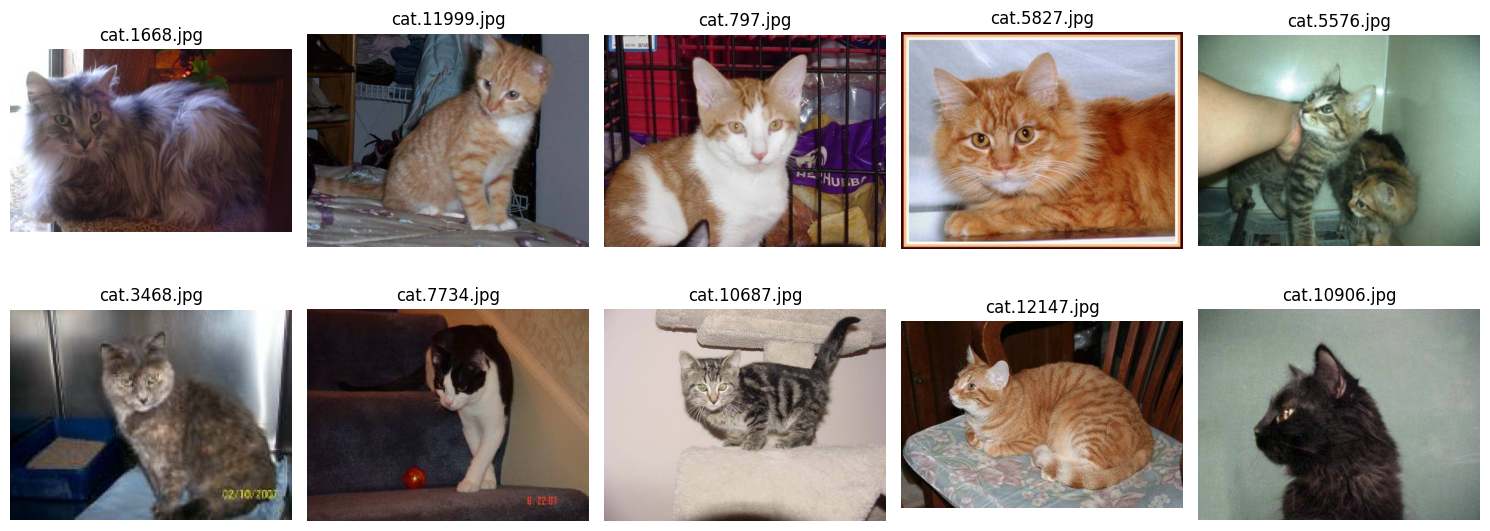

In [4]:
# Obtener una lista de todos los nombres de archivos de imágenes de gatos que comienzan con 'cat'
cat_images = [f for f in os.listdir(cat_dir) if f.startswith('cat')]

# Seleccionar aleatoriamente 10 imágenes de la lista
random.shuffle(cat_images)
cat_images = cat_images[:10]

# Configurar la figura para mostrar las imágenes
plt.figure(figsize=(15, 6))

# Mostrar las imágenes en una cuadrícula de 2x5
for i, image_name in enumerate(cat_images):
    image_path = os.path.join(cat_dir, image_name)
    
    with Image.open(image_path) as image:
        plt.subplot(2, 5, i + 1)  # Crear una cuadrícula de 2x5
        plt.imshow(image)
        plt.title(image_name)
        plt.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()

Crear los conuntos de imágenes

In [5]:
# Define the directory paths
train_dir = "../images/raw/train"  # Ensure this path is correct
test_dir = "../images/raw"    # Ensure this path is correct and points to the appropriate folder

# Define the image size
image_size = (200, 200)

# Create the data generators
datagentrain = ImageDataGenerator(rescale=1./255)  # Optional: Normalize the images
datagentest = ImageDataGenerator(rescale=1./255)

# Generate training data
train_data = datagentrain.flow_from_directory(
    directory=train_dir,         # The directory parameter should be the first argument
    target_size=image_size,
    classes=["cats", "dogs"],    # Define class labels based on the folder names
    batch_size=32,
    shuffle=True
)

# Generate test data
test_data = datagentest.flow_from_directory(
    directory=test_dir,          # The directory parameter should be the first argument
    target_size=image_size,
    classes=["test1"],           # The classes parameter here should correspond to actual folders in test_dir
    class_mode=None,             # If not using labels, set to None
    batch_size=32,
    shuffle=False
)


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [6]:

model = Sequential()
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))


c:\Users\USER\Documents\repos\realestate-datacleanup-exercise\image-classifier-project-tutorial\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compilar el modelo antes del entrenamiento
model.compile(loss = losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [11]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 38942s 50s/step - accuracy: 0.5309 - loss: 5.7550


In [12]:
_, accuracy = model.evaluate(train_data)

print(f"Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2641s 3s/step - accuracy: 0.5220 - loss: 0.7223
Accuracy: 0.5240799784660339


In [13]:
# Guardado de modelo

model.save("cat_dog.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
[[0.2914317  0.70856833]]
La imagen ../images/raw/test1/88.jpg es un perro.


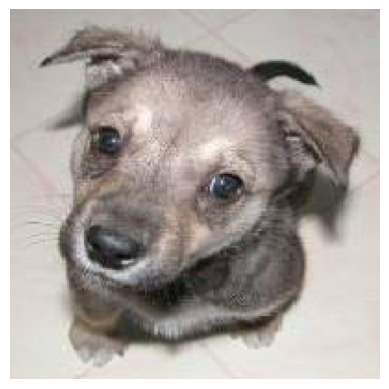

In [18]:

# Ruta de la imagen de prueba
image_path = '../images/raw/test1/88.jpg'

# Cargar la imagen y preprocesarla
img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

# Cargar el modelo entrenado desde el archivo
model = load_model('../project/cat_dog.keras')

# Hacer la predicción
output = model.predict(img_array)
print(output)

# Interpretar la predicción
if output[0][0] > output[0][1]:
    print(f'La imagen {image_path} es un gato.')
else:
    print(f'La imagen {image_path} es un perro.')

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.axis('off')
plt.show()